<a href="https://colab.research.google.com/github/wudiemengxi/learn-python/blob/master/decisontree%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

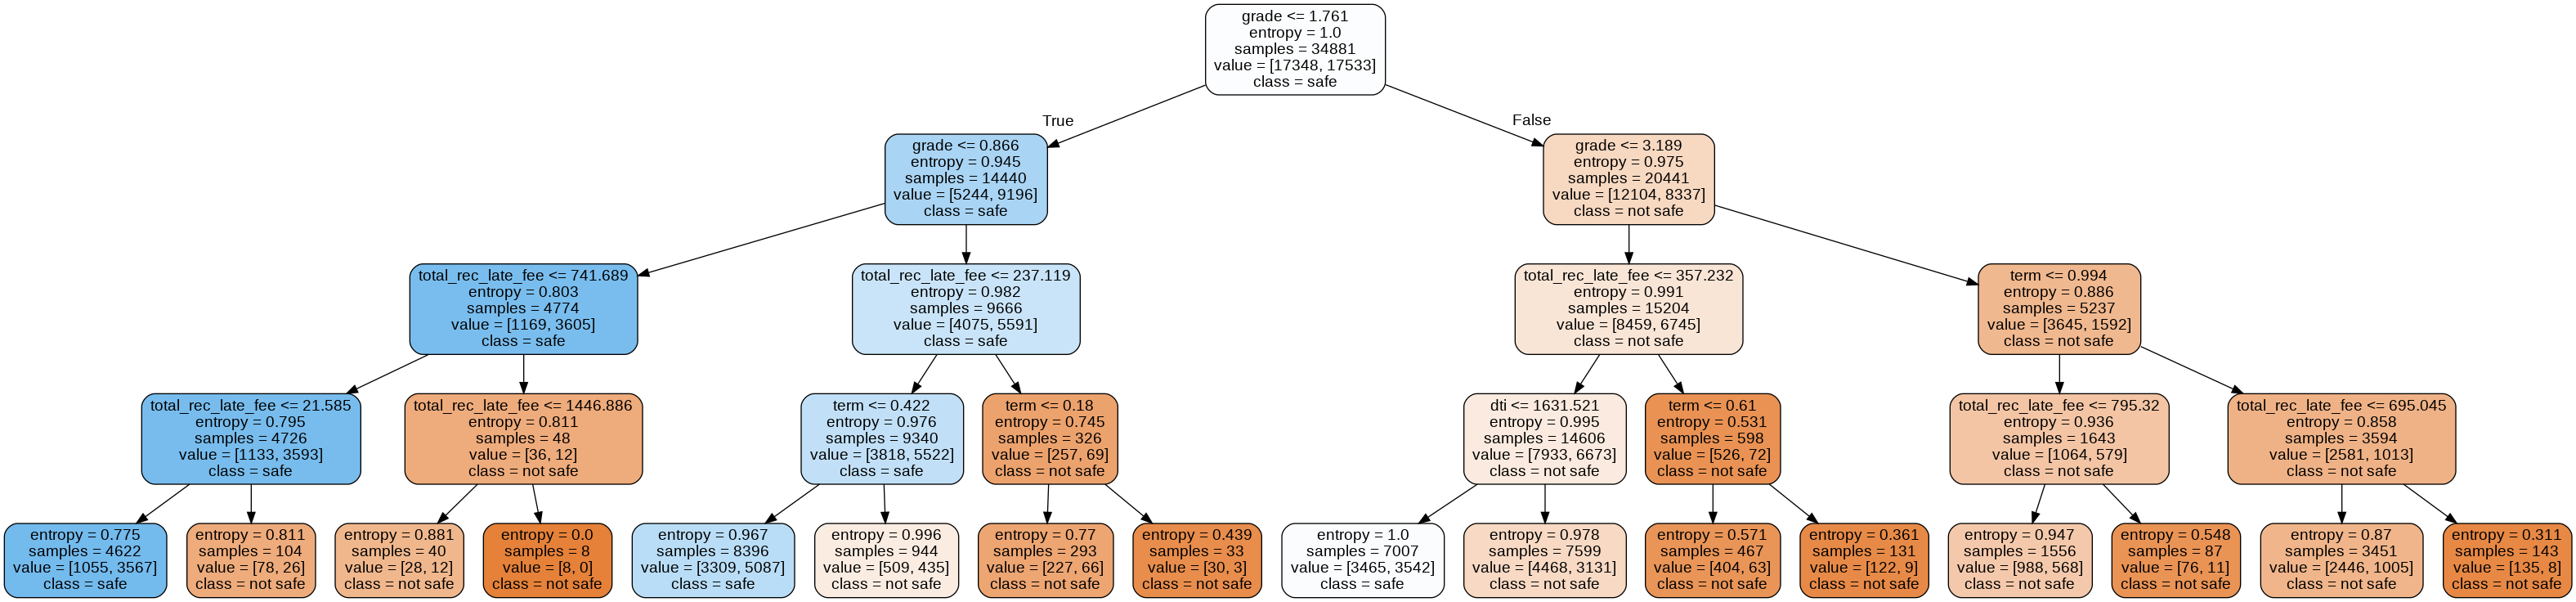

In [0]:
import pandas as pd
import graphviz
import sklearn
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from subprocess import check_call
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont


df=pd.read_csv('loans.csv')#读取文件

#将文件分开feature 与 target
X=df.drop('safe_loans',axis=1)
y=df.safe_loans

#映射非数值特征
d=defaultdict(LabelEncoder)
X_trans=X.apply(lambda x: d[x.name].fit_transform(x))


#将文件分为测试集与训练集

X_train, X_test, y_train, y_test=train_test_split(X_trans, y,random_state=1)

#模型

clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=4
                                ,splitter='random'
                                ,max_depth=4
#                                 ,min_samples_leaf=6
#                                 ,min_samples_split=10
                                  
                              )
clf=clf.fit(X_train,y_train)

#准确度

score=accuracy_score(y_test,clf.predict(X_test))
score

#绘制决策树

with open('safe-loans.dot','w') as f:
  f=tree.export_graphviz(clf,
                        out_file=f,
                        max_depth=4,
                        impurity=True,
                        feature_names=list(X_train),
                        class_names=['not safe', 'safe'],
                        rounded=True,
                        filled=True)
  

check_call(['dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])


img = Image.open("safe-loans.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")


# import matplotlib.pyplot as plt

# test=[]
# for i in range (10):
#   clf=tree.DecisionTreeClassifier(criterion='entropy'
#                               ,random_state=4
#                               ,splitter='random'
#                               ,max_depth=7
#                               ,min_samples_leaf=6
#                               ,min_samples_split=10
                                  
#                               )
  
#   clf=clf.fit(X_train,y_train)
#   score=clf.score(X_test,y_test)
#   test.append(score)
# plt.plot(range(1,11),test,color='red',label="max_depth")
# plt.legend()
# plt.show()

In [0]:
score

0.6225165562913907

In [0]:
import matplotlib.pyplot as plt
test=()
for i in range (10):
  clf=tree.DecisionTreeClassifier(criterion='entropy'
                              ,random_state=30
                              ,splitter='random'
                              ,max_depth=i+1
#                               ,min_samples_leaf=10
#                               ,min_samples_split=10
                              )
  
  clf=clf.fit(Xtrain,Ytrain)
  score=clf.score(Xtest,Ytest)
  test.append(score)
plt.plot(range(1,11),test,color='red',label="max_depth")
plt.legend()
plt.show()

NameError: ignored